# **Diabetes Prediction Using Classical ML methods & Deep Learning**

*  Problem Statement
*  Dataset description

*   Importing the dependinces



*  Exploratory data analysis (EDA)
*  Data Cleaning and Preproccesing
*   Feature Engineering
*   Modeling using ML

*   Model validation

*   Saving the model for deployment

## **Problem Statement**

The objective is to accurately classify whether a female individual has diabetes or not, also this model aims to assist healthcare professionals in early detection and intervention strategies for diabetes among females, thereby improving health outcomes and quality of life.

## **Dataset description**

*   **Pregnancies**: Number of times pregnant

*   **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
*  **BloodPressure**: Diastolic blood pressure (mm Hg)



*   **SkinThickness**: Triceps skin fold thickness (mm)
*   **Insulin**: 2-Hour serum insulin (mu U/ml)


*   **BMI**: Body mass index (weight in kg/(height in m)^2)


*   **DiabetesPedigreeFunction**: Diabetes pedigree function
*   **Age**: Age (years)


*   **Outcome**: Class variable (0 or 1) class value 1 is interpreted as "tested positive"






## **Importing the dependinces**

In [27]:
# for manipulation
import numpy as np
import pandas as pd

# for the visualization
import seaborn as sns
import matplotlib.pyplot as plt


# to use z-score method for handling outliers
from scipy import stats

#splitting the data
from sklearn.model_selection import train_test_split

# for Feature selection
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Modeling evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report ,accuracy_score
from sklearn.model_selection import cross_val_score

#saving the model
import pickle

In [28]:
# Load the dataset
df =pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# Explore Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [31]:
# Display summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
# Calculate the number of duplicates
num_duplicates = df.duplicated().sum()

# Print the number of duplicates
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


## **Exploratory data analysis (EDA)**

In [33]:
# check the outliers and correlations between the features and target variable

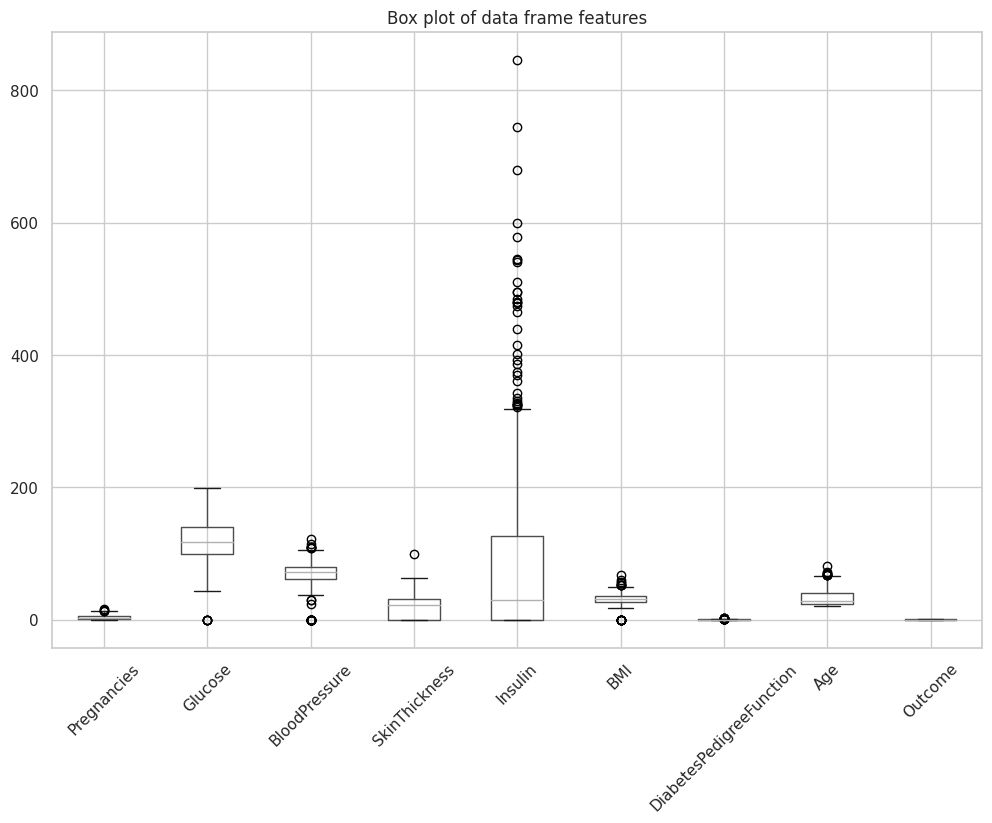

In [34]:
# Create box plots for each numerical feature
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Box plot of data frame features")
plt.xticks(rotation=45)
plt.show()

In [35]:
# handling the outliers
# Removing the Outliers using Z-Score method

print("Shape before removing outliers:", df.shape)
z_scores = stats.zscore(df)

# Define threshold for outliers
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers
df = df[~outliers]
print("Shape after removing outliers:", df.shape)

Shape before removing outliers: (768, 9)
Shape after removing outliers: (688, 9)


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.845930,120.293605,72.345930,20.787791,72.507267,32.209157,0.454555,33.094477,0.329942
std,3.279256,30.005790,12.312859,15.405391,90.106939,6.618891,0.284527,11.436990,0.470534
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,43.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.300000,0.605500,40.000000,1.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,55.000000,1.461000,68.000000,1.000000


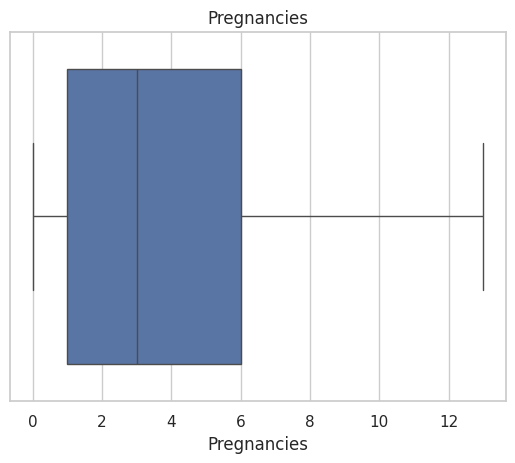

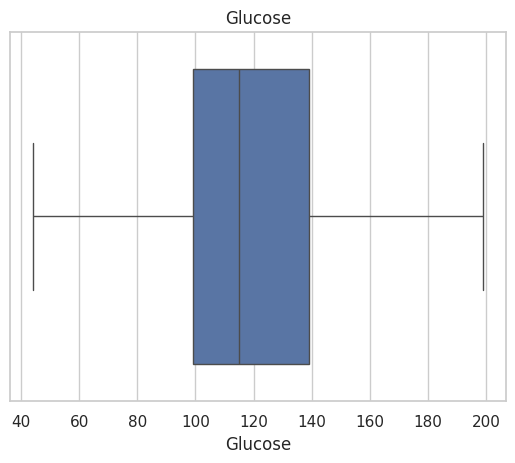

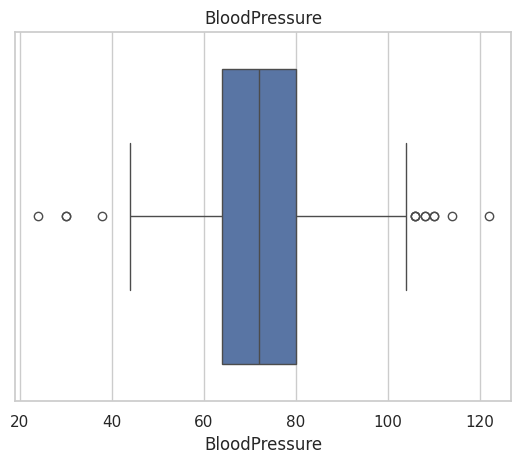

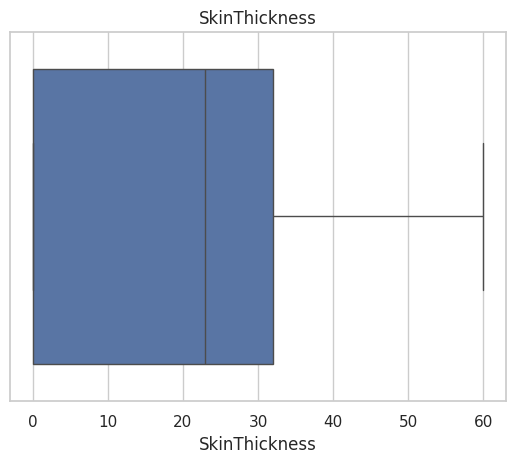

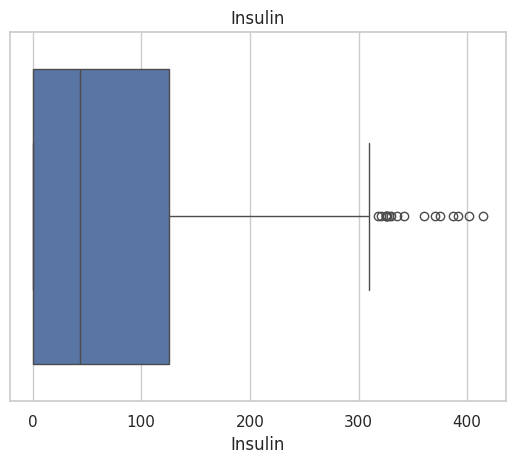

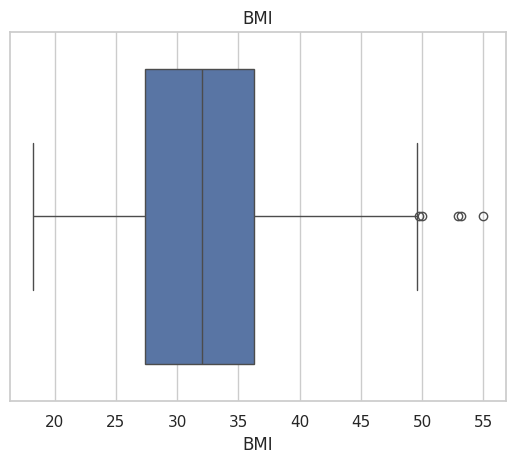

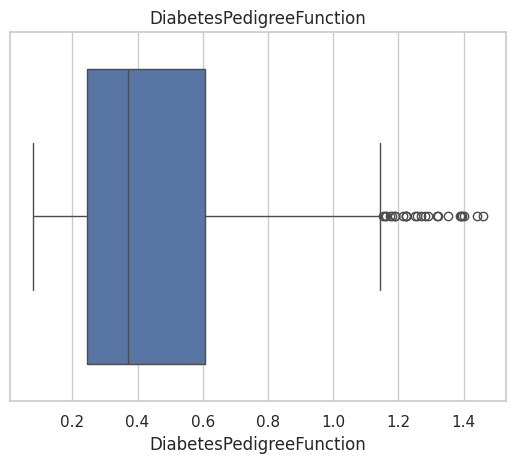

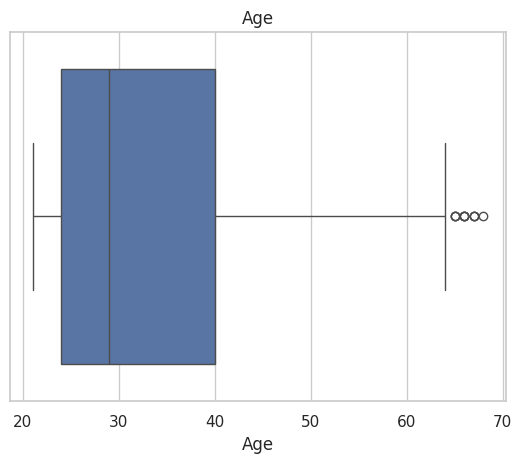

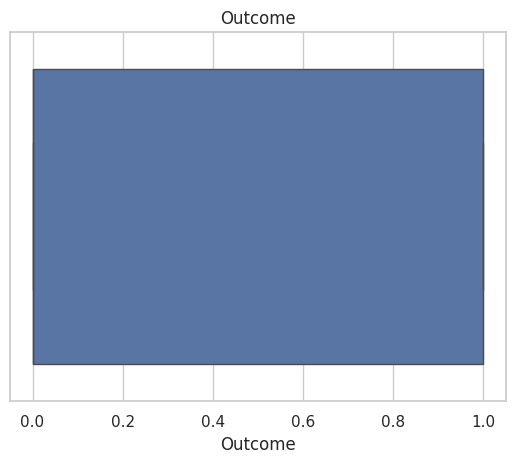

In [37]:
# Explore the distrbutions after using z-score to handle outliers
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

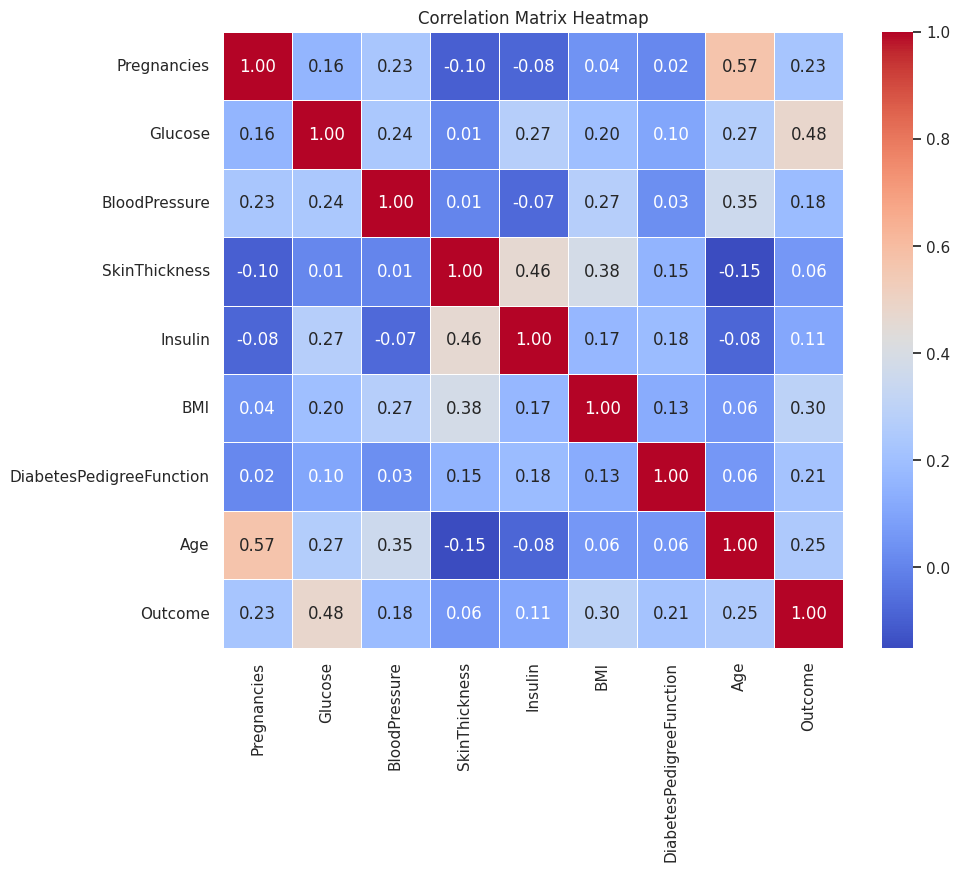

In [38]:
# find correlations by correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

As we noticed there is a positive corrleation between "Glucose" and the target variable also we can see in more deatil below

<ipython-input-39-107ea5d027ca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Outcome', y='Glucose', data=df, palette='Set2')


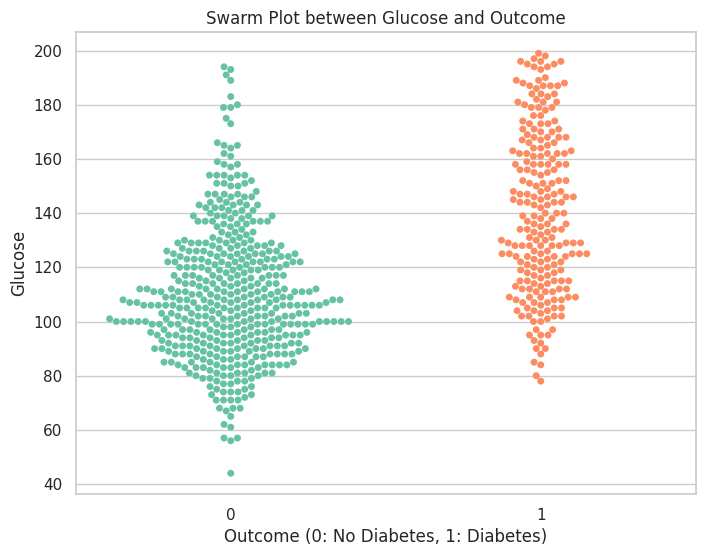

In [39]:
# Set seaborn style
sns.set(style="whitegrid")

# Swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Outcome', y='Glucose', data=df, palette='Set2')
plt.title('Swarm Plot between Glucose and Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Glucose')
plt.show()

## **Feature Engineering**
Adding new features to help in analysis process

In [40]:
# Age Group
def age_group(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle-aged'
    else:
        return 'Elderly'

df['Age_Group'] = df['Age'].apply(age_group)

# Create a new feature representing the relationship between BMI and Age
df['BMI_Age_Relation'] = df['BMI'] * df['Age']

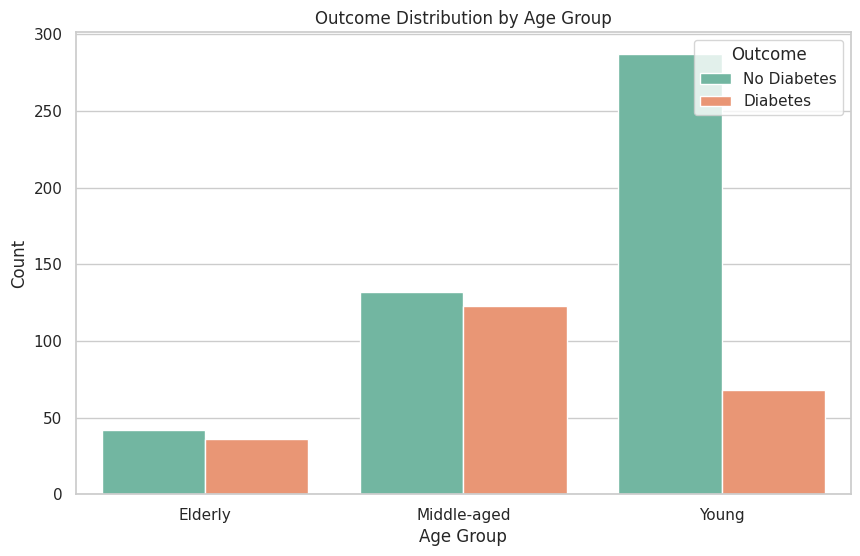

In [41]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Outcome', data=df, palette='Set2')
plt.title('Outcome Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Outcome', loc='upper right', labels=['No Diabetes', 'Diabetes'])
plt.show()

# 📊
**So we can see when the age be more than 30 (Middle-aged), the incidence of diabetes is more likely to occur.**

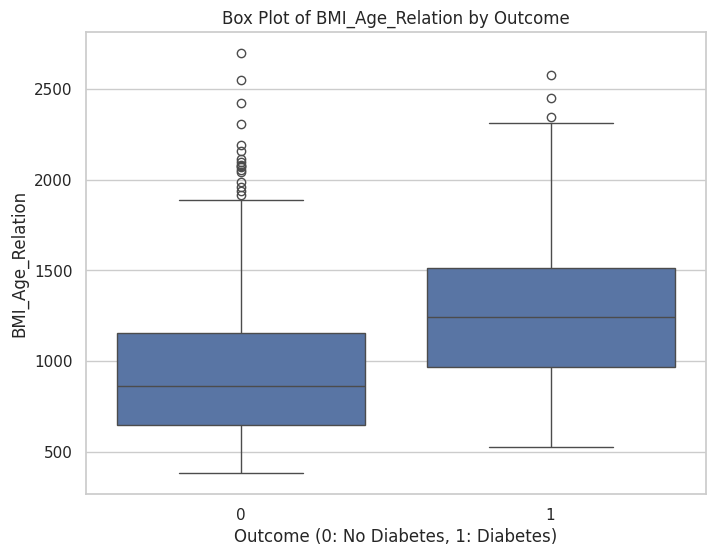

In [42]:
# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI_Age_Relation', data=df)
plt.title('Box Plot of BMI_Age_Relation by Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('BMI_Age_Relation')
plt.show()

When the relationship of BMI to Age increases, it leads to a higher incidence of diabetes. Which that the average value when outcome = 1 (diabetes) is **1289**
and when the outcome = 0 (No Diabetes) is **962**

## **Modeling and Spliting the Data**

In [43]:
y = df['Outcome']
X = df.drop(['Outcome','BMI_Age_Relation','Age_Group'] , axis=1)

## **Feature Scaling**

In [44]:
# Using StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.657355,0.924040,-0.028115,0.923219,-0.805266,0.210285,0.606516,1.479220
1,-0.868490,-1.177082,-0.515765,0.533462,-0.805266,-0.848063,-0.364220,-0.183265
2,1.267694,2.091330,-0.678315,-1.350366,-0.805266,-1.346999,0.764788,-0.095766
3,-0.868490,-1.043678,-0.515765,0.143704,0.238698,-0.621274,-1.011378,-1.058257
4,0.352186,-0.143197,0.134435,-1.350366,-0.805266,-0.999256,-0.891795,-0.270764
...,...,...,...,...,...,...,...,...
683,1.878032,-0.643464,0.296984,1.767693,1.193814,0.104450,-0.997309,2.616709
684,-0.563321,0.056910,-0.190665,0.403542,-0.805266,0.694102,-0.402909,-0.533262
685,0.352186,0.023559,-0.028115,0.143704,0.438606,-0.908540,-0.737040,-0.270764
686,-0.868490,0.190315,-1.003415,-1.350366,-0.805266,-0.318889,-0.371255,1.216722


In [45]:
#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((550, 8), (138, 8), (550,), (138,))

# **Model Selection**

### 1. Logistic Regression

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7463768115942029

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        86
           1       0.72      0.54      0.62        52

    accuracy                           0.75       138
   macro avg       0.74      0.71      0.71       138
weighted avg       0.74      0.75      0.74       138



### 2. Random Forest Classifier

In [48]:
rf_classifier = RandomForestClassifier(n_estimators=200 ,min_samples_split=25, random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.7608695652173914

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        86
           1       0.76      0.54      0.63        52

    accuracy                           0.76       138
   macro avg       0.76      0.72      0.73       138
weighted avg       0.76      0.76      0.75       138



### 3. XGBoost Classifier

In [49]:
xgb_classifier = XGBClassifier(n_estimators=3, max_depth=2, learning_rate=1)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier Accuracy: 0.7753623188405797

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        86
           1       0.78      0.56      0.65        52

    accuracy                           0.78       138
   macro avg       0.78      0.73      0.74       138
weighted avg       0.78      0.78      0.77       138



### 4. Support Vector Classifier (SVC)

In [50]:
svc_classifier = SVC(random_state=0)
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Support Vector Classifier Accuracy:", accuracy_svc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

Support Vector Classifier Accuracy: 0.7318840579710145

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        86
           1       0.74      0.44      0.55        52

    accuracy                           0.73       138
   macro avg       0.74      0.67      0.68       138
weighted avg       0.73      0.73      0.71       138



### Best model perfomred is XGBoost by acc = 77% ( due to small dataset )

##  **Cross Validation Score for XGBoost**

In [51]:
scores = cross_val_score(estimator=xgb_classifier, X=X_train, y=y_train, cv=5)

In [52]:
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())
print('Standard deviation of cross-validation scores:', scores.std())

Cross-validation scores: [0.74545455 0.73636364 0.79090909 0.74545455 0.72727273]
Mean cross-validation score: 0.7490909090909093
Standard deviation of cross-validation scores: 0.02196917449744467


## **Saving model**

In [53]:
pickle.dump(xgb_classifier,open('diabetes_model.sav','wb'))

pickle.dump(scaler, open('diabetes_model_scaler.sav', 'wb'))